# 1. Read data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv('../data/LTV/data_train.csv')
data_train['LTV_rate'] = data_train['Next_LTV']/data_train['LTV']
data_train.head()

,DateRange,CustomerID,Customer_AgeRange,Customer_NextAgeRange,LTV,Next_LTV,LTV_rate
0,1,12347,1,2,711.79,475.39,0.667880
1,1,12348,1,2,892.80,227.44,0.254749
2,3,12352,1,2,296.50,1265.31,4.267487
3,2,12359,1,2,547.50,1838.91,3.358740
4,9,12364,1,2,623.92,79.80,0.127901


In [3]:
profile_features = pd.read_csv('../data/LTV/profile_features.csv')
profile_features.head()

,CustomerID,Customer_AgeRange,AvgTimeBetweenOrder,ActiveDays,AvgQuantityPerInvoice,MinOrder,LastPurchase,AvgPurchasePerInvoice,AvgProductPerInvoice,OrderMomentum,NumInvoice,MaxOrder,TotalPurchase,group_ltvrate,group_ltv,group_ltv+rate
0,12583,1,10.511118,374,163094,10.08,374,292891.02,10914,0.154579,1,90.0,855.86,0,2,0
1,15100,1,7.000000,374,163094,350.40,367,292891.02,10914,0.142857,1,350.4,700.80,1,2,1
2,15291,1,16.000000,374,163094,35.70,358,292891.02,10914,0.062500,1,166.8,648.90,2,2,2
3,14688,1,10.511118,374,163094,8.50,374,292891.02,10914,0.154579,1,60.0,444.98,2,2,2
4,15311,1,2.633333,374,163094,0.65,351,292891.02,10914,0.372642,1,102.0,2660.01,1,2,1


In [4]:
data_train = data_train.merge(profile_features[['CustomerID', 'Customer_AgeRange', 'group_ltvrate', 'group_ltv', 'group_ltv+rate']])
data_train.head()

,DateRange,CustomerID,Customer_AgeRange,Customer_NextAgeRange,LTV,Next_LTV,LTV_rate,group_ltvrate,group_ltv,group_ltv+rate
0,1,12347,1,2,711.79,475.39,0.667880,2,2,2
1,1,12348,1,2,892.80,227.44,0.254749,2,1,1
2,3,12352,1,2,296.50,1265.31,4.267487,1,2,0
3,2,12359,1,2,547.50,1838.91,3.358740,0,0,0
4,9,12364,1,2,623.92,79.80,0.127901,0,2,0


# Active/Age tables

In [5]:
def cal_AAtables(df):
    draw_df = df.groupby(['CustomerID', 'DateRange', 'Customer_AgeRange'])[['LTV', 'LTV_rate']].mean().reset_index()
    draw_df['Active_DateRange'] = draw_df['DateRange'] - draw_df['Customer_AgeRange'] 
    draw_df.rename(columns = {'Customer_AgeRange': 'Age', 'Active_DateRange': 'Active'}, inplace=True)
    draw_df['Age'] = draw_df['Age']-1
    ltv_table = pd.pivot_table(draw_df, values = 'LTV', index = ['Active'], columns = ['Age'], aggfunc = np.mean)
    cnt_table = pd.pivot_table(draw_df, values = 'LTV', index = ['Active'], columns = ['Age'], aggfunc = np.count_nonzero)
    ltvrate_table = pd.pivot_table(draw_df, values = 'LTV_rate', index = ['Active'], columns = ['Age'], aggfunc = np.mean)
    return {'LTV': ltv_table, 'Number of customers': cnt_table, 'LTV_rate': ltvrate_table}

In [6]:
tables = list(cal_AAtables(data_train).items())

In [7]:
print (tables[0][0])
tables[0][1]

LTV


Age,0,1,2,3,4,5,6,7,8,9,10,11
Active,,,,,,,,,,,,
0,960.298426,1018.393064,1043.401889,1171.264246,830.220825,1267.531538,1281.793898,1204.462158,1716.609890,1842.531290,1686.290295,1602.412098
1,512.434828,962.804324,980.313125,596.264130,853.367647,1253.883902,872.539535,1199.296410,619.925745,1167.366667,1253.972917,NaN
2,497.965217,445.625263,492.895357,500.565000,402.697667,352.175122,624.796286,733.005333,653.826200,1198.932273,NaN,NaN
3,654.741014,561.177500,714.136000,571.542258,465.830313,655.618125,520.822593,829.775106,766.185000,NaN,NaN,NaN
4,590.907288,547.868571,510.692500,465.197200,509.451500,486.861667,423.483103,401.461176,NaN,NaN,NaN,NaN
5,450.249216,501.635882,435.423889,435.666000,406.297500,505.471071,568.092000,NaN,NaN,NaN,NaN,NaN
6,424.653125,307.138889,554.192222,371.332632,574.482222,686.592632,NaN,NaN,NaN,NaN,NaN,NaN
7,466.711471,504.956364,377.562632,391.381600,432.734167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,503.352500,262.717692,428.371579,540.629167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print (tables[1][0])
tables[1][1]

Number of customers


Age,0,1,2,3,4,5,6,7,8,9,10,11
Active,,,,,,,,,,,,
0,305.0,173.0,180.0,179.0,194.0,195.0,177.0,190.0,182.0,186.0,237.0,224.0
1,87.0,37.0,32.0,46.0,51.0,41.0,43.0,39.0,47.0,57.0,48.0,NaN
2,69.0,19.0,28.0,36.0,30.0,41.0,35.0,30.0,50.0,22.0,NaN,NaN
3,69.0,32.0,30.0,31.0,32.0,32.0,27.0,47.0,32.0,NaN,NaN,NaN
4,66.0,21.0,20.0,25.0,20.0,12.0,29.0,17.0,NaN,NaN,NaN,NaN
5,51.0,17.0,18.0,15.0,16.0,28.0,15.0,NaN,NaN,NaN,NaN,NaN
6,32.0,9.0,18.0,19.0,27.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
7,34.0,11.0,19.0,25.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,28.0,13.0,19.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print (tables[2][0])
tables[2][1]

LTV_rate


Age,0,1,2,3,4,5,6,7,8,9,10,11
Active,,,,,,,,,,,,
0,1.486499,2.355541,9.331102,3.013405,1.766588,1.168908,1.451366,9.602779,1.500128,1.524426,1.790677,0.910373
1,2.324381,3.967350,1.801803,2.343961,1.257693,1.250824,1.409024,1.913093,1.713916,1.163919,0.870212,NaN
2,3.100071,11.638121,1.304656,0.948543,0.973231,2.257808,1.316903,1.805256,1.324154,0.767589,NaN,NaN
3,1.308555,4.683410,1.268704,1.461218,2.172368,1.725878,1.304062,2.076773,0.664441,NaN,NaN,NaN
4,1.190351,1.019589,0.958278,1.527305,1.196296,1.049899,4.190930,0.977045,NaN,NaN,NaN,NaN
5,1.125499,1.307967,1.145823,1.392309,1.349866,1.040681,0.770332,NaN,NaN,NaN,NaN,NaN
6,0.828317,1.709232,0.945256,1.369240,1.066529,0.808228,NaN,NaN,NaN,NaN,NaN,NaN
7,1.175344,1.381666,1.639662,1.149492,0.766790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.440639,1.543666,3.137148,0.809442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def get_list_avg(data_train, field = 'LTV_rate'):
    return list(data_train.groupby(['Customer_AgeRange'])[field].mean())

# Visualize by groups of keys

In [11]:
import seaborn as sbn
import matplotlib.pyplot as plt

def visualize(data_train, group_name):
    clusters = data_train[group_name]
    num_clusters = clusters.max() + 1

    for field in ['LTV_rate', 'LTV']:
        ltv_rate = get_list_avg(data_train, field)
        sbn.lineplot(range(len(ltv_rate)), ltv_rate, label='All')

        for c in range(num_clusters):
            idx = np.where(clusters == c)[0]
            training_df_grp = data_train.iloc[idx, :]
            print ('Group %d: Avg %s = %4.4f ' % (c, field, np.mean(training_df_grp[field], axis = 0)))
            list_avg = get_list_avg(training_df_grp, field)
            sbn.lineplot(range(len(list_avg)), list_avg, label = 'Group_%d' % c)
        # plt.legend(range(num_clusters))
        plt.title(field)
        plt.show()

Group 0: Avg LTV_rate = 3.1430 
Group 1: Avg LTV_rate = 1.5812 
Group 2: Avg LTV_rate = 2.1666 


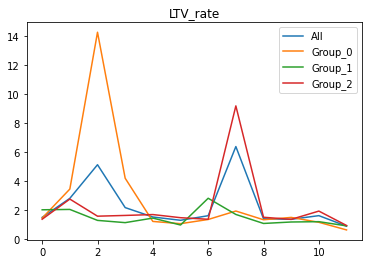

Group 0: Avg LTV = 871.6198 
Group 1: Avg LTV = 1081.0564 
Group 2: Avg LTV = 1015.6296 


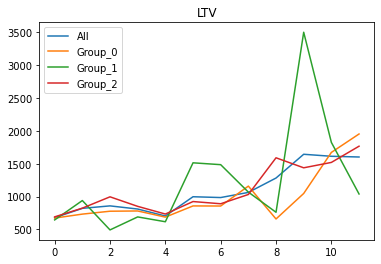

In [12]:
visualize(data_train, 'group_ltv')

Group 0: Avg LTV_rate = 2.8168 
Group 1: Avg LTV_rate = 1.4213 
Group 2: Avg LTV_rate = 1.7049 


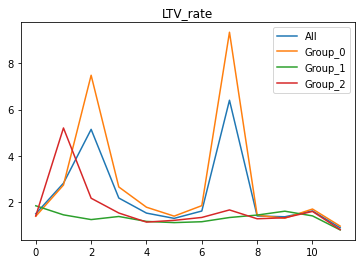

Group 0: Avg LTV = 1032.1257 
Group 1: Avg LTV = 956.8238 
Group 2: Avg LTV = 917.1280 


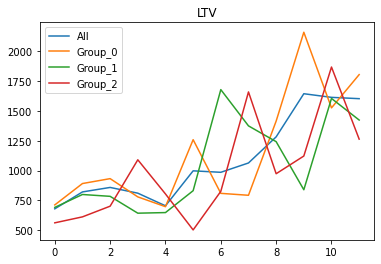

In [13]:
visualize(data_train, 'group_ltvrate')

Group 0: Avg LTV_rate = 1.6074 
Group 1: Avg LTV_rate = 1.5498 
Group 2: Avg LTV_rate = 4.2467 


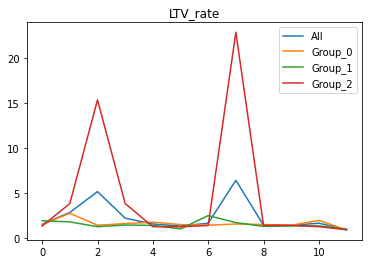

Group 0: Avg LTV = 978.4375 
Group 1: Avg LTV = 1119.3547 
Group 2: Avg LTV = 929.5103 


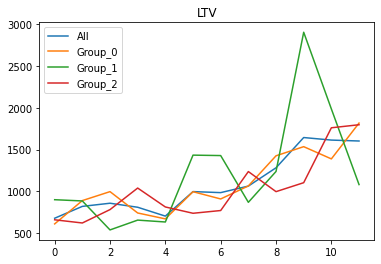

In [14]:
visualize(data_train, 'group_ltv+rate')